<img src="https://cs6.pikabu.ru/images/big_size_comm/2017-08_6/1504088679155420172.png" height="400"> 

# Андан на экономе

## Семинар 1: симуляции в python

На этом семинаре мы поговорим про то, как в python можно симулировать разные случайные величины и решать с помощью симуляций разные задачи. 

## 1. Разминка

В задачах для разминки можно пользоваться как классическим `python`, так и `numpy`. Мы с ним ещё чисто формально не знакомы и только начинаем с ним дружить. Но семинаристы уже могут начать вас к нему приучать.

### Задачка 1 (про монетки)

У Олега и Мирона есть монетки. Они их подкидывают и орут "ОРЁЛ - РЕШКА". Монетка Олега выпадает орлом с вероятностью $0.6$. Монетка Мирона с вероятностью $0.4$. Мирон и Олег подкидывают свою монету, пока не выпадет орёл.

__а)__ Найдите с помощью симуляций вероятность того, что Олег сделает больше подбрасываний, чем Мирон. 

In [ ]:
import random

p = 0.6
# 0 - орёл, 1 - решка
random.choices([0, 1], weights=[p, 1-p], k=1) # выберет 0 с вероятностью p и 1 с вероятностью 1-p   1 раз

[0]

Решение без scipy 

In [ ]:
def get_sample(p):
    ans = random.choices([0, 1], weights=[1-p, p], k=1)[0]
    cnt = 1
    while ans == 0:
        cnt += 1
        ans = random.choices([0, 1], weights=[1-p, p], k=1)[0]
    return cnt

In [4]:
get_sample(p=0.6)

1

In [ ]:
# Симуляция 10^6 наблюдений
# Для этого мы будем использовать функцию get_sample, которая возвращает количество бросков до первого появления
n_obs = 10**6
x = [get_sample(0.6) for i in range(n_obs)]
y = [get_sample(0.4) for i in range(n_obs)]

In [6]:
y[:10]

[1, 3, 1, 1, 1, 1, 1, 2, 8, 6]

Подсчёт доли случаев, где Олег бросал больше:

In [17]:
cnt = 0
for i,j in zip(x,y):
    if i > j:
        cnt += 1
cnt/n_obs

0.211013

Решение с numpy и scipy 

In [12]:
import numpy as np         # библиотека для матриц и математики
from scipy import stats    # модуль для работы со статистикой

geom_x = stats.geom(0.6)  # геометрическое распределение для Олега
geom_y = stats.geom(0.4)  # для Мирона

geom_x.rvs(10)

array([3, 2, 4, 1, 4, 2, 1, 3, 1, 2])

In [13]:
x = geom_x.rvs(n_obs)  # массив из n_obs симуляций (число бросков Олега)
y = geom_y.rvs(n_obs)  # массив из n_obs симуляций (число бросков Мирона)

In [18]:
x > y  # сравнение идёт поэлементно

array([False, False, False, ..., False, False, False])

доля случаев, когда Олег бросил больше раз, чем Мирон

In [19]:
np.mean(x > y)

np.float64(0.211013)

__б)__ Пусть $X$ -- число подкидываний Мирона, а $Y$ -- Олега. Найдите с помощью симуляций $\mathbb{E}(X - Y)$.

Если у тебя есть выборка $( x_1, x_2, \dots, x_n)$, то:

$
\mathbb{E}[X] \approx \frac{1}{n} \sum_{i=1}^{n} x_i = \text{np.mean(x)}
$

То есть, это приближение истинного математического ожидания $\mathbb{E}[X]$ по данным.

Аналогично:

- `np.var(x)` приближает $\text{Var}(X)$
- `np.std(x)` приближает $\sqrt{\text{Var}(X)}$
- `np.mean(x - y)` приближает $\mathbb{E}[X - Y]$
- `np.mean(x < y)` приближает $\mathbb{P}(X < Y)$


In [20]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ БРЯ!

np.mean(x - y)

np.float64(-0.834013)

### Задачка 2 (про удава)

Удав Анатолий любит французские багеты. Длина французского багета равна 1 метру. За один заглот Удав Анатолий заглатывает кусок случайной длины, равномерно распределённый на отрезке $[0;1]$. Для того, чтобы съесть весь багет удаву потребуется случайное количество $N$ заглотов.

Найдите с помощью симуляций $\mathbb{E}(N)$ и $\text{Var}(N)$. 

In [ ]:
umiform_rv = stats.uniform(0,1) # равномерное распределение от 0 до 1

umiform_rv.rvs() # один укус

np.float64(0.6470456219991916)

In [22]:
# Поедаем весь багет

def ukus(l=1):
    k = 0
    while l > 0:
        k += 1 # k = k + 1
        l -= umiform_rv.rvs()
    return k

In [23]:
ukus()

2

In [24]:
# На самом деле E(N) = e
np.mean([ukus() for i in range(10000)])

np.float64(2.7217)

In [28]:
np.var([ukus() for i in range(10000)])

np.float64(0.7600595100000002)

Эту задачку очень сложно решить в лоб, но вы можете попробоввать. В сборнике сложных задач по терверу, [культурном коде](https://github.com/bdemeshev/probability_dna/raw/master/probability_dna.pdf), можно найти три разных решения этой задачки. Она там находится под номером 46.

### Задачка 3 (про шнур)

На шнуре длиной 1 метр случайным образом делают два разреза. С какой вероятностью хотя бы один из получившихся кусков будет длиннее $0.5$м?

In [29]:
n_obs = 10 ** 6

umiform_rv = stats.uniform(0,1)

x1 = umiform_rv.rvs(n_obs) # первый надрез 
x2 = umiform_rv.rvs(n_obs) # второй надрез 
 
usl_1 = (x1 < x2) & ( (x1 > 0.5) | (x2 - x1 > 0.5) | (1 - x2 > 0.5))  # первый вариант 
usl_2 = (x1 > x2) & ( (1 - x1 > 0.5) | (x1 - x2 > 0.5) | (x2 > 0.5)) # второй вариант 

np.mean(usl_1 | usl_2)

np.float64(0.750345)

## 2. Генерация случайных величин в python



In [30]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека дл работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации и картинок
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # можно выбрать для графиков свой любимый стиль
%matplotlib inline

Иногда для решения задач по теории вероятностей или исследования свойств статистических алгоритмов нужно сгенерировать случайную выборку из какого-нибудь распределения. Чтобы сгенерировать в `python` любую случайную величину, нужно сделать две вещи: 

* Создать генератор. 

Внутри пакета `scipy.stats` есть [много разных распределений.](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) Среди всего этого обилия нужно найти нужное распределение и задать его параметры. Давайте сделаем это  на примере **нормального распределения**, $X \sim N(\mu, \sigma^2)$. Того самого распределения, плотность которого выглядит как: 

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot  e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$


Параметр ```loc``` задаёт $\mu$, ```scale``` — среднеквадратичное отклонение $\sigma$.

In [31]:
norm_rv = stats.norm(loc=0, scale=1)  # задали генератор 

Когда конкретный генератор готов, у него можно вызывать разные методы: 

* `rvs` сгенерирует нам выборку из распределения объёма `size`
* `cdf` вычислит для нас значение функции распределения (cumulative distribution function) в указанной точке
* `pdf` вычислит значение плотности распредеелния (probability density function) в указанной точке 
* `ppf` вычислит квантиль, указанного уровня

[В документации](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) можно найти и другие методы, но мы с ними практически не будем встречаться в течение нашего курса (см. разел statistical functions).

In [34]:
sample = norm_rv.rvs(1000)  # сгенерируем 1000 значений
sample[:10]

array([ 0.32923021, -0.72270766, -0.80241065, -0.32600645,  1.3153632 ,
        2.51535545, -1.00229135,  0.32597885, -0.36504916, -1.46920388])

## 3. Плотность и функция распределения

Теперь мы можем немного поэкспериментировать с нашей случайной величиной. Например, __мы можем узнать значиние плотности $f(1)$__.

In [36]:
norm_rv.pdf(1)

np.float64(0.24197072451914337)

Можем построить картинку для плотности распределения, $f(x)$. 

In [37]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

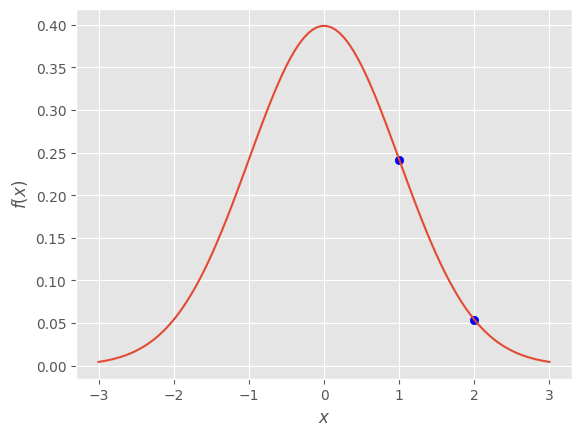

In [38]:
plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1,2], [norm_rv.pdf(1), norm_rv.pdf(2)], color="blue");

Теперь узнаем значение функции распределения в точке $1$: $$F(1) = P(X \le 1) = \int_{-\infty}^1 f(x)dx$$

In [39]:
norm_rv.cdf(1)

np.float64(0.8413447460685429)

На плотности распределения это выглядит как площадь до точки $1$, то есть вероятность того, что $X \le 1$.

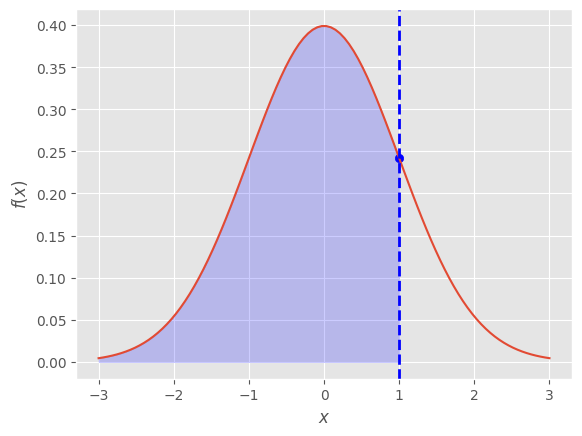

In [40]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1], [norm_rv.pdf(1)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(-3, 1, 100)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2);

Можем построить картинку для функции распределения.

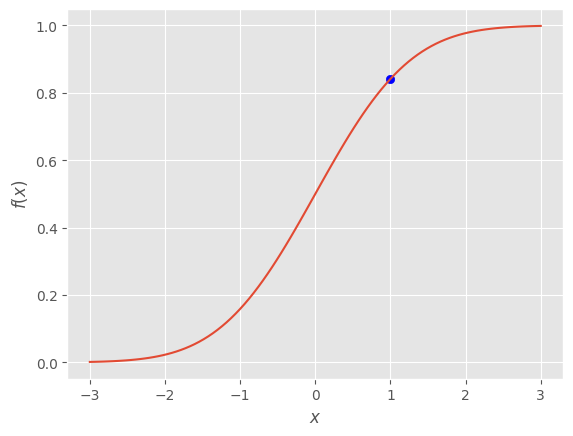

In [41]:
x = np.linspace(-3, 3, 100)
cdf = norm_rv.cdf(x)

plt.plot(x, cdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем F(1)
plt.scatter([1], [norm_rv.cdf(1)], color="blue");

А теперь найдём ещё одну вероятность:

$$ P(1 < X < 3) = \int_1^3 f(x) dx = F(3) - F(1)$$

In [42]:
norm_rv.cdf(3) - norm_rv.cdf(1)

np.float64(0.15730535589982697)

Это уже вероятность попасть в конкретный отрезок, изобразим её на плотности распределения. 

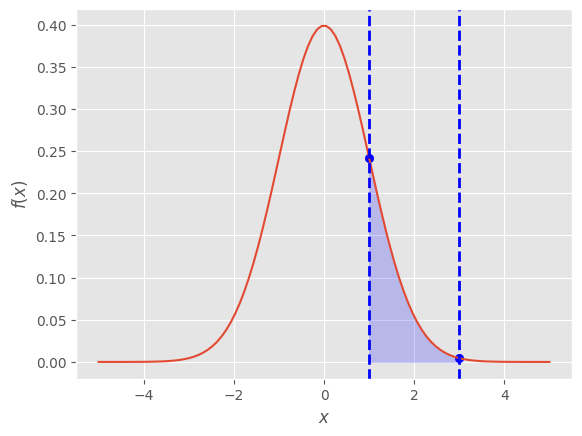

In [44]:
x = np.linspace(-5, 5, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1, 3], [norm_rv.pdf(1), norm_rv.pdf(3)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(1, 3)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2)
plt.axvline(3, color='blue', linestyle="--", lw=2);

Для полноты картины осталось только найти какой-нибудь квантиль. Квантиль уровня $\gamma$ это такое число $q$, что 

$$P(X \le q) = \gamma$$

Найдём $5\%$ и нарисуем его на картинке с плотностью:

In [45]:
q = norm_rv.ppf(0.1)
q = norm_rv.ppf(0.5)  # медиана
q

np.float64(0.0)

Text(0.1, 0.33511151553720353, '0.0')

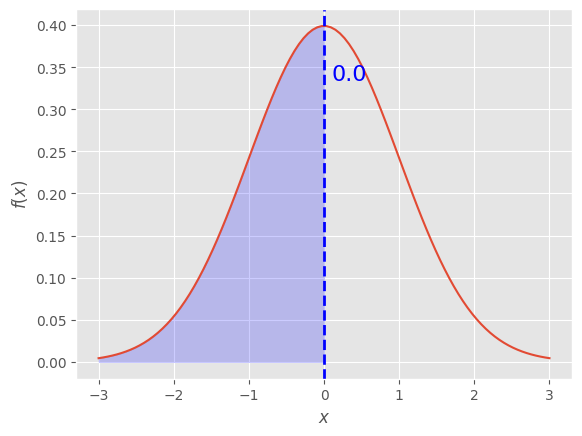

In [46]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

xq = np.linspace(-3, q)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(q, color='blue', linestyle="--", lw=2)

y_max = plt.ylim()[1]
plt.text(q + 0.1, 0.8*y_max, round(q,2), color='blue', fontsize=16)

Обратите внимание, что всё, что мы сейчас делали - мы делали с теоретическим распределением. По аналогии можно работать с любым другим распределением. Например, с экспоненциальным: 

In [47]:
exp_rv = stats.expon(scale=5)
exp_rv.rvs(5)

array([3.03472036, 9.03505172, 2.71404964, 1.15824208, 6.9991838 ])

## 4. Эмпирическое распределение 

Давайте теперь поработаем с выборкой. Обычно мы не знаем из какого распределения она пришла к нам в руки. Мы можем посчитать какие-нибудь характеристики для нашей случайной величины.

In [48]:
sample[:10]

array([ 0.32923021, -0.72270766, -0.80241065, -0.32600645,  1.3153632 ,
        2.51535545, -1.00229135,  0.32597885, -0.36504916, -1.46920388])

In [49]:
sample.shape

(1000,)

In [50]:
np.mean(sample)  # выборочное среднее(при больших n похоже на математическое ожидание)

np.float64(-0.012583836143573621)

In [51]:
np.var(sample)   # выборочная дисперсия

np.float64(0.9509437760337109)

In [52]:
np.std(sample)   # выборочное стандартное отклонение

np.float64(0.9751634611867442)

In [53]:
np.median(sample) # выборочная медиана

np.float64(-0.015092286577507164)

Построим гистограмму. Гистограмма - это эмпирическая оценка для плотности распределения. 

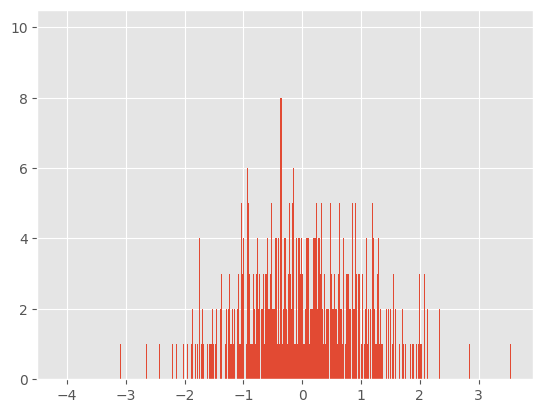

In [54]:
plt.hist(sample, bins=1000);  # bins отвечает за число столбцов

Нарисуем гистограмму и плотность на одной картинке. 

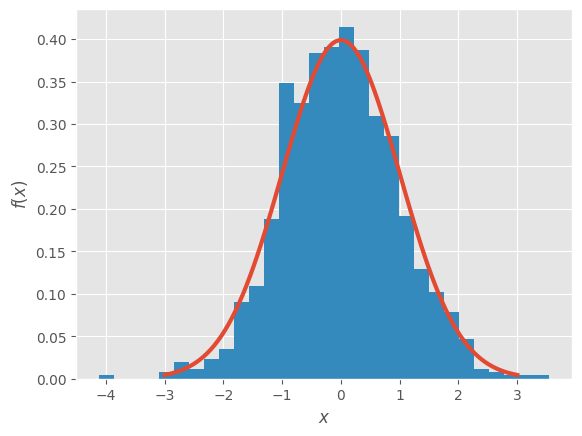

In [55]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

# гистограмма, параметр density отнормировал её. 
plt.hist(sample, bins=30, density=True);

plt.ylabel('$f(x)$')
plt.xlabel('$x$');

Построим по выборке эмпирическую функцию распределения. 

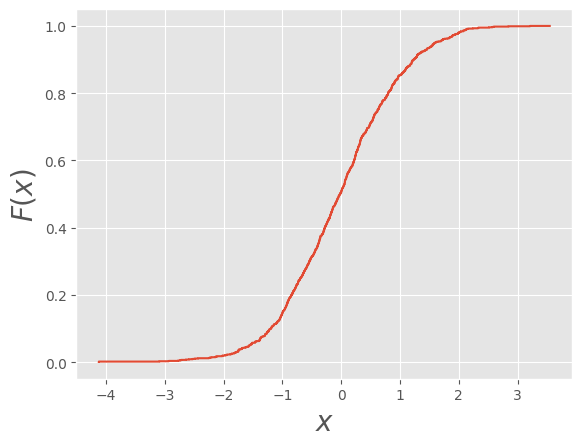

In [56]:
# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(sample)   # строим эмпирическую функцию по выборке

plt.step(ecdf.x, ecdf.y)
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

Можно нарисовать её на одной картинке с теоретической:

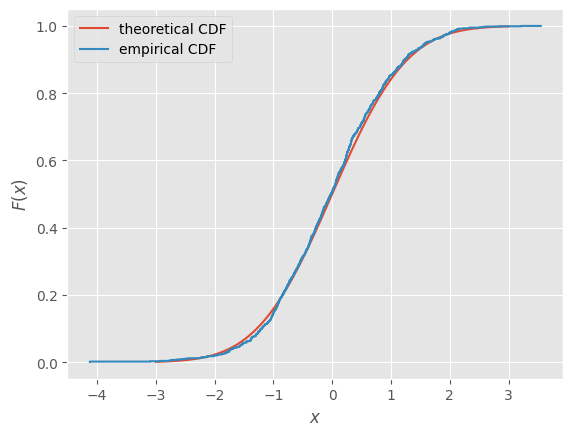

In [57]:
x = np.linspace(-3, 3, 100)

# теоретическа cdf 
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# эмпирическая сdf
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

## 5. Генерация выборок

С помощью таких же нехитрых манипуляций можно симулировать различные события. Например, можно сгенерировать выборку без повторений из вектора `1:10` размера `5`. Все элементы будут выбираться равновероятно.

Мы это будем делать [с помощью `np.random`.](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html) Внутри numpy реализованы самые простые генераторы, и их, обычно, использовать довольно удобно. 

In [58]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [59]:
np.random.choice(np.arange(1,11), 
                 size=5,
                 replace=False) # выборка без повторений

array([ 2,  1, 10,  4,  5])

Можно делать генерации с повторениями, параметр `replace` базово равен `True`.

In [60]:
np.random.choice(np.arange(1,11), 
                 size=5,
                replace=True) # с повторениями

array([ 1, 10,  8,  1,  1])

А ещё можно самостоятельно расставить вероятности событий. Давайте, например устроим симуляцию рыбалки! 

In [61]:
np.random.choice(['карась', 'плотва', 'щука'], 
                 size=10, 
                 p=[0.5, 0.2, 0.3]) # с повторениями

array(['щука', 'карась', 'щука', 'плотва', 'карась', 'щука', 'карась',
       'щука', 'карась', 'щука'], dtype='<U6')

## 6. Зёрна 

Если выполнить команду `stats.norm(loc=3, scale=2).rvs(5)` на двух разных компьютерах или два раза на одном и том же, то результат будет разный. Не зря же они случайные :)

In [90]:
rv = stats.norm(loc=3, scale=2)
rv.rvs(5)

array([3.29848777, 2.07402213, 4.12619443, 0.73029052, 4.70172632])

In [91]:
stats.norm(loc=3, scale=2).rvs(5)

array([ 3.00692099, -0.08157868,  3.42914645,  1.7926523 ,  0.60126069])

Однако генерирование случайных величин никак не противоречит идее абсолютно точной воспроизводимости исследований. Для того, чтобы получились одинаковые результаты, необходимо синхронизировать генераторы случайных чисел на этих двух компьютерах. Делается это путём задания зерна генератора случайных чисел (seed). Зерно также называют стартовым значением. В качестве зерна подойдёт любое целое число.

In [93]:
stats.norm(loc=3, scale=2).rvs(5, random_state=111)

array([0.73232333, 3.76863839, 5.99310755, 2.28923541, 1.42493292])

__Угадайте, какие числа чаще всего используют для зёрен?__

Многие алгоритмы в анализе данных в какой-то степени основаны на случайности (например в самом начале обучения веса берутся из какого-то распределения или обучение идёт на случайной подвыборке). Чтобы добиться воспроизводимых, одинаковых результатов, не зависящих от запуска, нужно устанавливать зерно генерации. 

## 7. Ещё больше задачек!

### Задачка 4 (про спам)

> Звёзды лучше видны с крыши, полезай и проверь сам. Ты так ждал этот знак свыше, и отметил его как спам.

Пусть количество писем со спамом, которое пришло к нам на почту, имеет распределение Пуассона. Предположим, что вы получаете в среднем три спам-письма в день. Какова доля дней, в которые вы получаете пять или больше спам-писем? 

In [95]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ гррра

# Тут не надо делать никаких симуляций!
# 1 - P(X <= 4) = 1 - F(4)

1 - stats.poisson(3).cdf(4)

np.float64(0.1847367554762278)

### Задачка 5 (очень важная задача, где ничего не работает)

К сожалению, возможности симуляций сильно ограничены. Всё может сломаться. 

__а)__ Пусть $X \sim N(0,3)$. Попробуйте с помощью симуляций оценить $\mathbb{E}\left(\frac{1}{X^2 + 1} \right)$. Много раз запустите код. Стабильно ли ведёт себя оценка?

In [97]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ а-а-а-а

norm_rv = stats.norm(loc=0, scale=3)
x = norm_rv.rvs(10**6)
y = 1/(x**2 + 1)
np.mean(y)

np.float64(0.3257563346514493)

In [98]:
x = norm_rv.rvs(10**6)
y = 1/(x**2 + 1)
np.mean(y)

np.float64(0.32617748409985264)

In [68]:
x = norm_rv.rvs(10**6)
y = 1/(x**2 + 1)
np.mean(y)

np.float64(0.32691404268586244)

__б)__ Сделайте то же самое с $\mathbb{E}\left(\frac{1}{X} \right)$. Стабильно ли ведёт себя оценка? Объясните, почему так происходит.

In [108]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ е-е-е-е

x = norm_rv.rvs(10**6)
y = 1/x
np.mean(y)

np.float64(0.18296830536289496)

In [106]:
x = norm_rv.rvs(10**6)
y = 1/x
np.mean(y)

np.float64(0.399790859173035)

In [71]:
x = norm_rv.rvs(10**6)
y = 1/x
np.mean(y)

np.float64(0.32855930354769947)

Так происходит из-за деления на ноль, случайная величина 1/N(0,3) имеет распределение Коши
Как известно, у этого распределения не существует математического ожидания... 

### Задачка 6 (человек и параход)

Иван Фёдорович Крузенштерн (ШТО?!) случайным образом с возможностью повторов выбирает $10$ натуральных чисел от $1$ до $100$. Пусть $X$ — минимум из этих чисел, а $Y$ — максимум.

С помощью симуляций оцените все величины ниже. Пользуйтесь векторными вычислениями в numpy!

__а)__ $\mathbb{P}(Y > 3X)$

In [73]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ и ууууу иии ууууу
np.random.randint(1, 100, size=5)

array([53, 99, 58, 61, 65], dtype=int32)

In [74]:
np.random.randint(1, 100, size=(5,5))

array([[28, 32, 28, 64,  7],
       [ 3, 29, 90, 50, 55],
       [73, 58, 92, 21, 67],
       [86, 98, 37, 38, 15],
       [30, 51, 30, 67, 57]], dtype=int32)

In [75]:
n_obs = 10 ** 6
X = np.random.randint(1, 100, size=(n_obs, 10))

y = X.max(axis=1)
x = X.min(axis=1)
y

array([95, 96, 90, ..., 96, 96, 99], dtype=int32)

In [76]:
np.mean(y > 3*x)

np.float64(0.971531)

__б)__ $\mathbb{E}(X \cdot Y)$

In [77]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ррррааа!
np.mean(x*y)

np.float64(869.265584)

__в)__ $\mathbb{P}(Y > 3X \mid Y < X^2)$

In [78]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  пррррррр
usl = y < x**2
sum(usl) # проверка числа наблюдений

np.int64(392892)

In [79]:
np.mean(y[usl] > 3*x[usl])

np.float64(0.9275398837339524)

__г)__ $\mathbb{E}(X \cdot Y \mid Y < X^2)$

In [80]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ як як як як як
np.mean(y[usl] * x[usl])

np.float64(1606.6009539517222)

__д)__ $\mathbb{E}\left(\frac{X}{X + Y} \right)$

In [81]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ вуп вуп вуп
np.mean(x/(x + y))

np.float64(0.0898834067416303)

__е)__ $\text{Corr}(X,Y)$

In [82]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ hmmmmmmm
np.corrcoef(x, y)

array([[1.      , 0.098787],
       [0.098787, 1.      ]])

__ё)__ Быква ё важна! Это вам скажет Лёв Толстой и Пафнутий Чебышёв!

Нарисуйте облако рассеивания для выборки из $1000$ наблюдений $x,y$

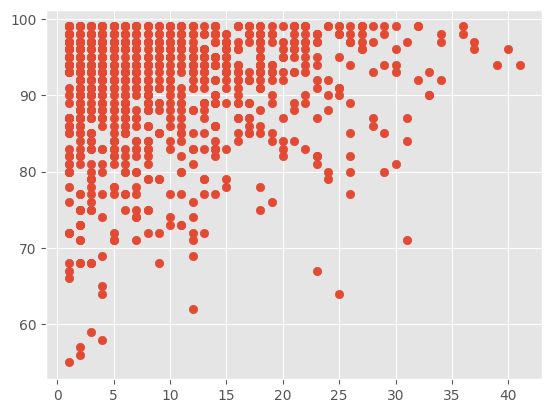

In [83]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  уоу
plt.scatter(x[:1000], y[:1000]);

__ж)__ Нарисуйте гистограмму для случайной величины $X$, отметьте на гистограмме пунктирными линиями разных цветов её медиану и среднее.

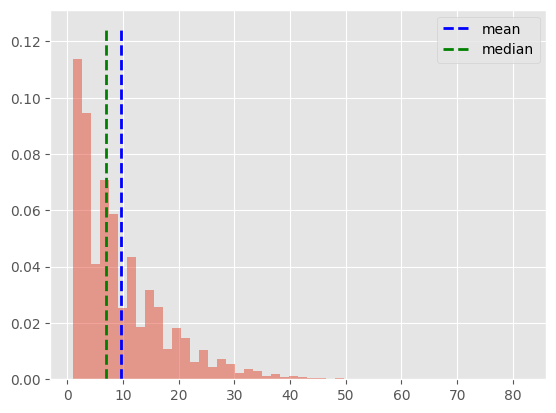

In [84]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  whaat?
plt.hist(x, bins=50, density=True, alpha=0.5);
plt.vlines(np.mean(x), 0, 0.125, color='blue', lw=2, linestyles='--', label='mean')
plt.vlines(np.median(x), 0, 0.125, color='green', lw=2, linestyles='--', label='median')
plt.legend();

### Задачка 7 (нейросетки)

Юра завёл себе две нейросетки и два сервера и начал их обучать. Две нейросети обучаются независимо на двух серверах. Время их обучения $T_1$ и $T_2$ равномерно распределено на отрезке $[1;3]$ (обучение измеряется в минутах). В процессе обучения сервер может упасть. Момент падения сервера $T$ распределён экспоненциально с параметром $\lambda = 0.3$. Момент падаения сервера не зависит от времени обучения нейросеток. Известно, что одна из нейросетей успела обучиться, а вторая не успела. Какова вероятность того, что $T \le 1.5$?

**Hint:** при решении задачи помните о том, что у вас две нейросетки!

In [85]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ скрррааа па па ка ка ка скидики па па энд э пу пу дррр бум скьа ду ду ку ку тун тун пум пум

n_obs = 10**7

# сгенерировали время обучения (оно независимое)
T1 = stats.uniform(1,2).rvs(size=n_obs)
T2 = stats.uniform(1,2).rvs(size=n_obs)

# сгенерировали время падения (не зависит от времени обучения)
T = stats.expon(scale=1/0.3).rvs(size=n_obs)

In [86]:
usl1 = (T1 >= T)&(T2 < T) # Первая не смогла обучиться, вторая смогла 
usl2 = (T1 < T)&(T2 >= T) # наоборот

In [87]:
np.mean(usl1 | usl2) # оценка для полной вероятности (кстати говоря, так то она не нужна) 

np.float64(0.1106444)

In [88]:
len(T[usl1 | usl2]) # проверка достаточно ли событий для оценки (мб их попало в условие мало и надо взять n больше)

1106444

In [89]:
np.mean(T[usl1 | usl2] <= 1.5)# Находим нужную вероятность 

np.float64(0.18916547064288838)